In [1]:
import rasterio
import dask.array as da
import numpy as np 
from gbdxtools.ipe_image import IpeImage
from gbdxtools import Interface
import json

gbdx = Interface()

In [2]:
img = IpeImage('45784ada-cf81-4bbd-b4bd-d95c7a3bb7bb', bounds=[-105.26801347732545,40.00817393602954,-105.26406526565553,40.01108296862613])

In [3]:
with img.open() as src:
    assert isinstance(src, rasterio.DatasetReader)

rgb = img[[4,2,1], ...] # should not fetch
assert isinstance(rgb, da.Array)
print rgb.shape

(3, 768, 768)


In [4]:
from matplotlib import pyplot as plt
%matplotlib inline

def plot(data, stretch=[2,98]):
    f, ax1 = plt.subplots(1, figsize=(20,10))
    ax1.axis('off')
    data = np.rollaxis(data, 0, 3)
    lims = np.percentile(data,stretch,axis=(0,1))
    for x in xrange(len(data[0,0,:])):
        top = lims[:,x][1]
        bottom = lims[:,x][0]
        data[:,:,x] = (data[:,:,x]-bottom)/float(top-bottom)
    data = np.clip(data,0,1)
    plt.imshow(data,interpolation='nearest')   
    plt.show(block=False)

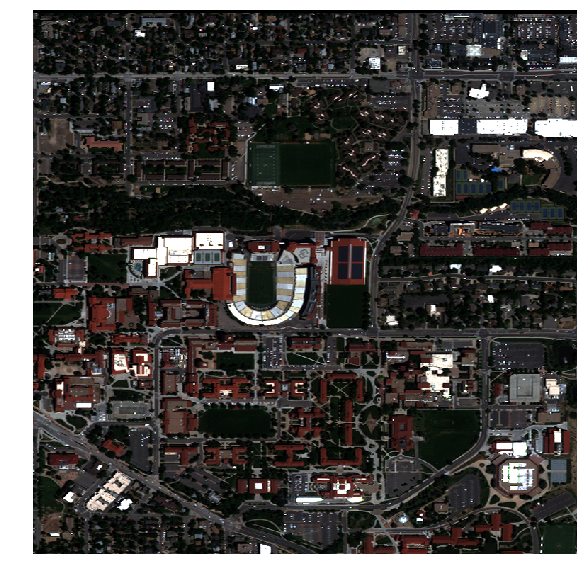

In [5]:
# shouldnt have to call compute here 
plot(rgb.compute())

In [6]:
cat_id = '1030010059784E00'
bounds = [-105.26801347732545,40.00817393602954,-105.26406526565553,40.01108296862613]

img = gbdx.image(cat_id)

aoi = img.aoi(bounds)
rgb = aoi[[4,2,1], ...] # should not fetch
print rgb.shape

(3, 768, 768)


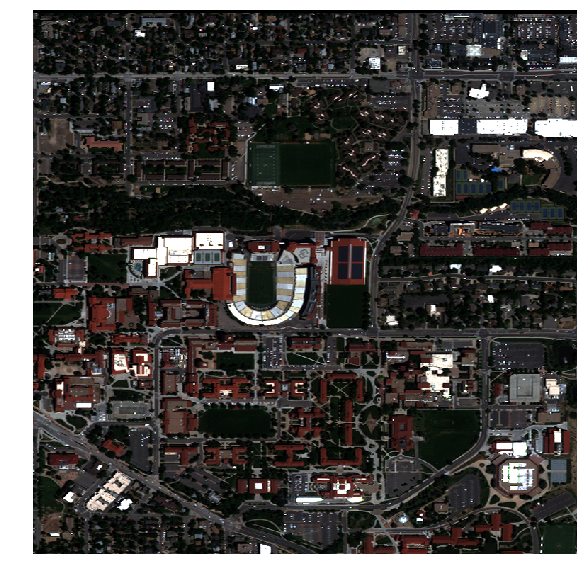

In [7]:
plot(rgb.compute())